# Carregamento dos Dados e Bibliotecas

In [ ]:
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
from sklearn.metrics import calinski_harabasz_score
from scipy.stats.mstats import winsorize
from sklearn.model_selection import KFold

In [ ]:
credit_data = pd.read_csv('/content/credit_card_clients.csv', header=1)

# Análise dos dados

In [ ]:
credit_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

Iremos buscar encontrar um padrão entre o limite do cartão de crédito do cliente e o valor total das últimas faturas do cartão

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
credit_data.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [ ]:
credit_data.shape

(30000, 25)

# Pré-processamento

Vamos começar tirando a última coluna que não iremos utilizar

In [ ]:
new_credit_data = credit_data.drop('default payment next month', axis=1)
new_credit_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0  ...        689          0          0          0         0       689   
1  ...       2682       3272       3455       3261         0      1000   
2  ...      13559      14331      14948      15549      1518      1500   
3  ...      49291      28314      28959      29547      2000      2019   
4  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         0         0         0         0  
1      1000      1000         0      2000  
2      1000      1000      1000      5000  
3      1200      1100      1069      1000  
4     10000      9000       689       679  

[5 rows x 24 columns]

In [ ]:
new_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

Como queremos encontrar um padrão entre o limite do cartão de crédito e a fatura total dos últimos meses, vamos adicionar uma atribuição de fatura total do cliente no nosso dataset, chamaremos de "BILL_TOTAL" e ela irá receber a soma das últimas faturas do cliente.

In [ ]:
new_credit_data['BILL_TOTAL'] = credit_data['BILL_AMT1'] + credit_data['BILL_AMT2'] + credit_data['BILL_AMT3'] + credit_data['BILL_AMT4'] + credit_data['BILL_AMT5'] + credit_data['BILL_AMT6']

In [ ]:
new_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   SEX         30000 non-null  int64
 3   EDUCATION   30000 non-null  int64
 4   MARRIAGE    30000 non-null  int64
 5   AGE         30000 non-null  int64
 6   PAY_0       30000 non-null  int64
 7   PAY_2       30000 non-null  int64
 8   PAY_3       30000 non-null  int64
 9   PAY_4       30000 non-null  int64
 10  PAY_5       30000 non-null  int64
 11  PAY_6       30000 non-null  int64
 12  BILL_AMT1   30000 non-null  int64
 13  BILL_AMT2   30000 non-null  int64
 14  BILL_AMT3   30000 non-null  int64
 15  BILL_AMT4   30000 non-null  int64
 16  BILL_AMT5   30000 non-null  int64
 17  BILL_AMT6   30000 non-null  int64
 18  PAY_AMT1    30000 non-null  int64
 19  PAY_AMT2    30000 non-null  int64
 20  PAY_AMT3    30000 non-null  

Analisando se há outliers

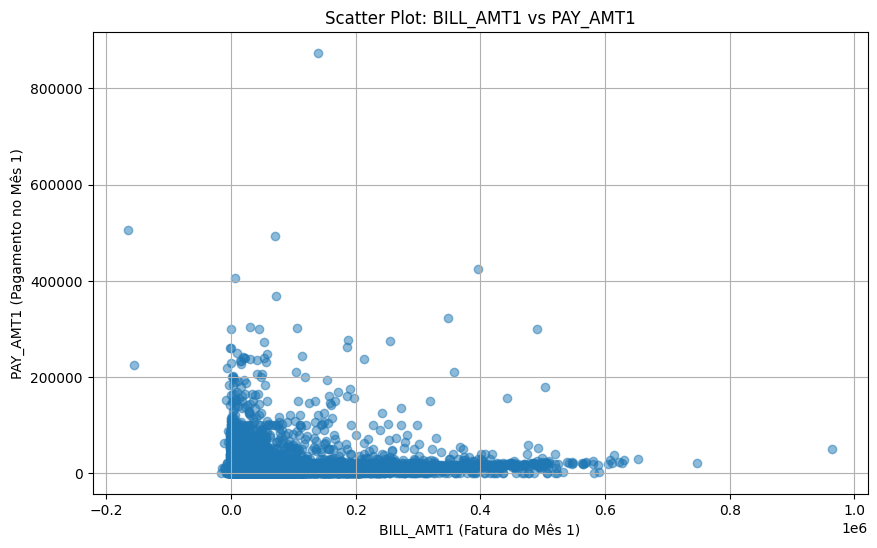

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(new_credit_data['BILL_AMT1'], new_credit_data['PAY_AMT1'], alpha=0.5)
plt.title('Scatter Plot: BILL_AMT1 vs PAY_AMT1')
plt.xlabel('BILL_AMT1 (Fatura do Mês 1)')
plt.ylabel('PAY_AMT1 (Pagamento no Mês 1)')
plt.grid(True)
plt.show()

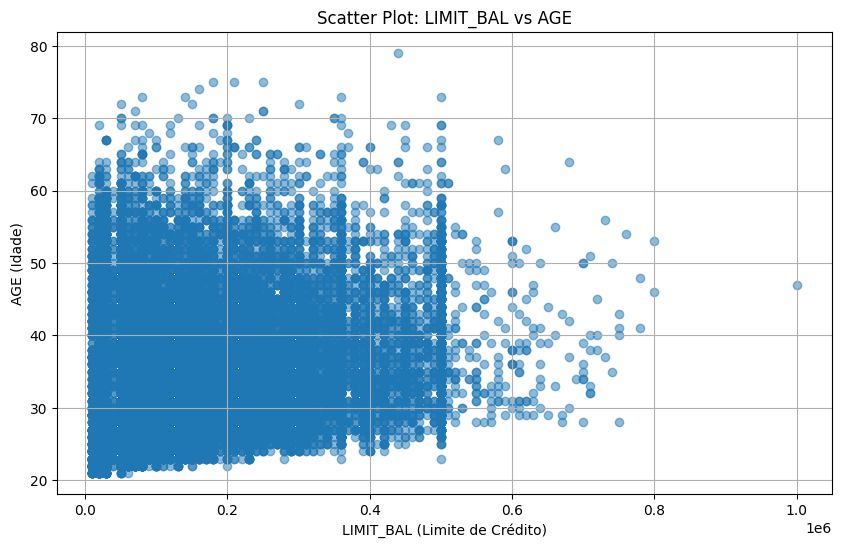

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(new_credit_data['LIMIT_BAL'], new_credit_data['AGE'], alpha=0.5)
plt.title('Scatter Plot: LIMIT_BAL vs AGE')
plt.xlabel('LIMIT_BAL (Limite de Crédito)')
plt.ylabel('AGE (Idade)')
plt.grid(True)
plt.show()

Notamos alguns outliers nos gráficos acima, então faremos a substituição por valores menos extremos, geralmente próximos aos especificados usando o Winsorization. E para isso vamos pegar as colunas de nosso interesse.

In [ ]:
columns_of_interest = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_TOTAL']

new_credit_data_winsorized = new_credit_data.copy()
for column in columns_of_interest:
    new_credit_data_winsorized[column] = winsorize(new_credit_data[column], limits=[0.05, 0.05])

print(f"Original dataset shape: {new_credit_data.shape}")
print(f"Winsorized dataset shape: {new_credit_data_winsorized.shape}")

Original dataset shape: (30000, 25)
Winsorized dataset shape: (30000, 25)


Iremos utilizar somente as atribuições que nos interessam, ou seja: LIMIT_BAL,	SEX,	EDUCATION,	MARRIAGE,	AGE e BILL_TOTAL

In [ ]:
X_card = new_credit_data_winsorized.iloc[:, [1,2,3,4,5,24]].values
X_card

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]])

In [ ]:
# Padronizando os dados
scaler_cartao = StandardScaler()
X_card = scaler_cartao.fit_transform(X_card)
X_card

array([[-1.19363225,  0.81016074,  0.18582826, -1.05729503, -1.30338359,
        -0.8104958 ],
       [-0.36602324,  0.81016074,  0.18582826,  0.85855728, -1.07261046,
        -0.77878717],
       [-0.61430594,  0.81016074,  0.18582826,  0.85855728, -0.14951791,
        -0.49266854],
       ...,
       [-1.11087135, -1.23432296,  0.18582826,  0.85855728,  0.19664179,
        -0.59807194],
       [-0.69706684, -1.23432296,  1.45111372, -1.05729503,  0.65818806,
         0.0653805 ],
       [-0.94534955, -1.23432296,  0.18582826, -1.05729503,  1.2351209 ,
        -0.05551693]])

# Clusterização por Kmeans



## Aplicação do Método Kmeans

Aqui estamos aplicando o kmeans para 1 até 10 clusters para analisar o gráfico do cotovelo e escolher o número de clusters mais adequado

In [ ]:
wcss = []

for i in range(1, 11):
  kmeans_card = KMeans(n_clusters=i, random_state=0)
  kmeans_card.fit(X_card)
  wcss.append(kmeans_card.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

In [ ]:
grafico = px.line(x=range(1,11), y=wcss)
grafico.show()

Analisando o gráfico do cotovelo, ficamos entre escolher 3 clusters ou 4 clusters. Então, vamos testar k igual a 3 e depois 4 e veremos como ficam suas silhuetas para decidirmos a melhor quantidade de clusters

In [ ]:
k = 3
kmeans_card = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
cluster_labels_kmeans = kmeans_card.fit_predict(X_card)
cluster_labels_kmeans

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

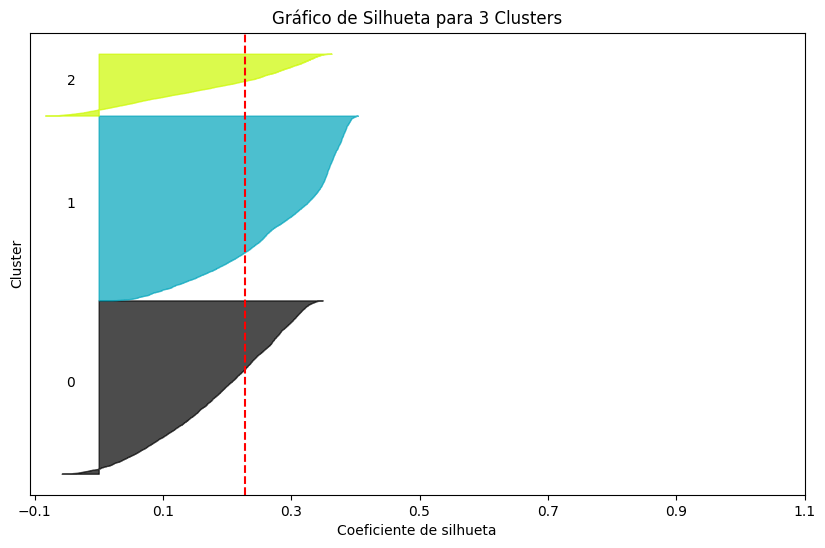

In [ ]:
silhouette_avg = silhouette_score(X_card, cluster_labels_kmeans)
sample_silhouette_values = silhouette_samples(X_card, cluster_labels_kmeans)
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_kmeans == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_xlabel("Coeficiente de silhueta")
ax.set_ylabel("Cluster")

ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.title(f"Gráfico de Silhueta para {k} Clusters")
plt.show()

In [ ]:
k = 4
kmeans_card = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
cluster_labels_kmeans = kmeans_card.fit_predict(X_card)
cluster_labels_kmeans

array([3, 3, 3, ..., 1, 0, 0], dtype=int32)

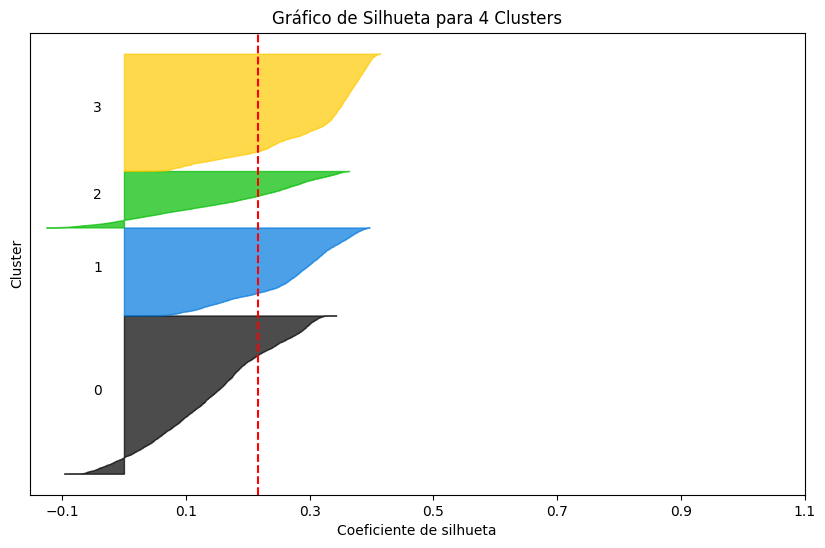

In [ ]:
silhouette_avg = silhouette_score(X_card, cluster_labels_kmeans)
sample_silhouette_values = silhouette_samples(X_card, cluster_labels_kmeans)
fig, ax = plt.subplots(figsize=(10, 6))

y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_kmeans == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_xlabel("Coeficiente de silhueta")
ax.set_ylabel("Cluster")

ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.title(f"Gráfico de Silhueta para {k} Clusters")
plt.show()

De acordo com o gráfico de cotovelo e as silhuetas, decidimos escolher 3 clusters para o nosso dataset usando o kmeans

In [ ]:
kmeans_card = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
cluster_labels_kmeans = kmeans_card.fit_predict(X_card)
cluster_labels_kmeans

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

## Avaliação dos Resultados do Método Kmeans

Usamos o Silhouette Score, Davies-Bouldin Score e o Calinski and Harabasz Score para avaliar o método.

### Silhouette Score

In [ ]:
sil_score = silhouette_score(X_card, cluster_labels_kmeans)
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.2287


### Davies-Bouldin Score

In [ ]:
db_score = davies_bouldin_score(X_card, cluster_labels_kmeans)
print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 1.6371279623502606


### Calinski and Harabasz Score

In [ ]:
ch_score = calinski_harabasz_score(X_card, cluster_labels_kmeans)
print(f"Calinski-Harabasz Score: {ch_score}")

Calinski-Harabasz Score: 7053.149888532814


## Apresentação dos Resultados do Método Kmeans

Iremos utilizar das técnicas PCA e t-SNE para visualizarmos os resultados do método kmeans para 3 clusters

### PCA

In [ ]:
pca = PCA(n_components=2)
X_card_kmeans_pca = pca.fit_transform(X_card)
X_card_kmeans_pca.shape

(30000, 2)

In [ ]:
X_card_kmeans_pca

array([[-0.69722451,  1.26071255],
       [-1.49433531,  0.47891589],
       [-0.90398892,  0.60782591],
       ...,
       [-0.724937  ,  1.06739541],
       [ 1.34526131,  1.46095578],
       [ 1.29793283,  1.04642873]])

In [ ]:
grafico = px.scatter(x= X_card_kmeans_pca[:,0], y = X_card_kmeans_pca[:,1], color=cluster_labels_kmeans)
grafico.show()

### t-SNE

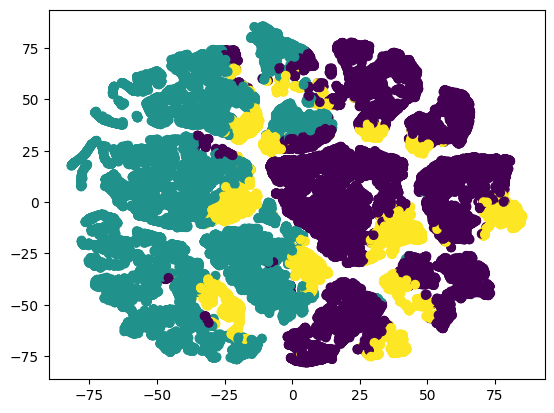

In [ ]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(X_card)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys, c=cluster_labels_kmeans)
plt.show()

# Clusterização por Hierarquia

## Aplicação do Método de Clusterização Hierárquica

Vamos começar construindo um dendograma para o nosso dataset para analisarmos qual a quantidade de clusters escolher para esse método

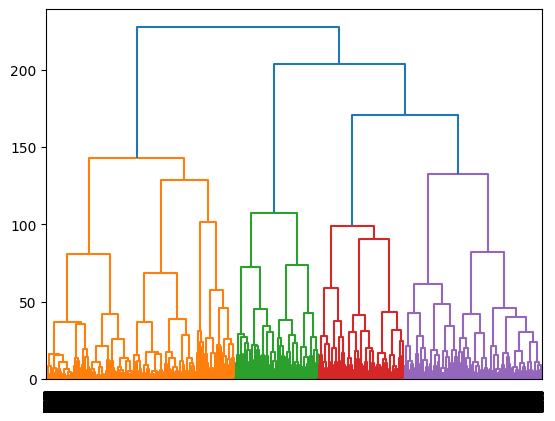

In [ ]:
dendrograma = dendrogram(linkage(X_card, method='ward'))

Analisando o dendrograma, decidimos usar 4 clusters para aplicarmos o método

In [ ]:
hc_card = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_labels_hc = hc_card.fit_predict(X_card)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



## Avaliação dos Resultados do Método de Clusterização Hierárquica

Utilizaremos as mesmas métricas avaliar o método de clusterização hierárquica.

### Silhouette Score

In [ ]:
sil_score_hc = silhouette_score(X_card, cluster_labels_hc)
print(f'Silhouette Score: {sil_score_hc:.4f}')

Silhouette Score: 0.1740


### Davies-Bouldin Score

In [ ]:
db_score_hc = davies_bouldin_score(X_card, cluster_labels_hc)
print(f"Davies-Bouldin Score: {db_score_hc}")

Davies-Bouldin Score: 1.7031417777977804


### Calinski and Harabasz Score

In [ ]:
ch_score_hc = calinski_harabasz_score(X_card, cluster_labels_hc)
print(f"Calinski-Harabasz Score: {ch_score_hc}")

Calinski-Harabasz Score: 5179.470427134545


## Apresentação dos Resultados do Método de Clusterização Hierárquica

Para visualizarmos os resultados, utilizamos as mesmas técnicas anteriores.

### PCA

In [ ]:
pca_hc = PCA(n_components=2)
X_card_hc_pca = pca_hc.fit_transform(X_card)
X_card_hc_pca.shape

(30000, 2)

In [ ]:
X_card_hc_pca

array([[-0.69722451,  1.26071255],
       [-1.49433531,  0.47891589],
       [-0.90398892,  0.60782591],
       ...,
       [-0.724937  ,  1.06739541],
       [ 1.34526131,  1.46095578],
       [ 1.29793283,  1.04642873]])

In [ ]:
grafico = px.scatter(x= X_card_hc_pca[:,0], y = X_card_hc_pca[:,1], color=cluster_labels_hc)
grafico.show()

### t-SNE

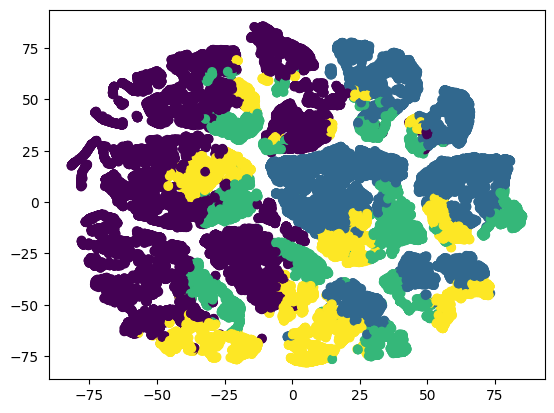

In [ ]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(X_card)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys, c=cluster_labels_hc)
plt.show()

# Clusterização por DBScan

## Aplicação do Método DBScan

Para aplicar o método DBScan, precisamos saber qual o melhor valor para se usar no eps, portanto decidimos calcular as distâncias do 5º vizinho mais próximo para cada ponto e montar um gráfico para determinar os pontos que são considerados do mesmo cluster.

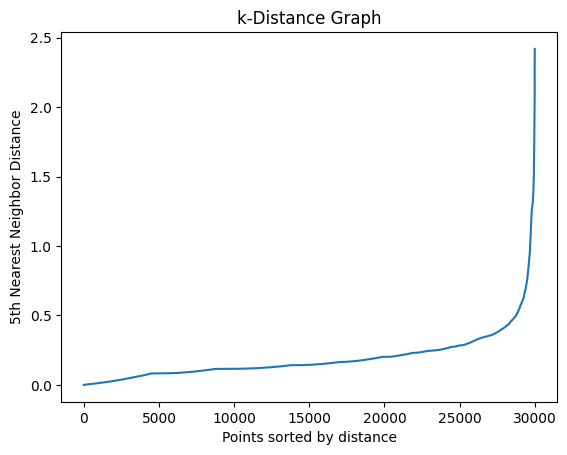

In [ ]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_card)
distances, indices = nbrs.kneighbors(X_card)

distances = np.sort(distances[:, 4])

plt.plot(distances)
plt.ylabel('5th Nearest Neighbor Distance')
plt.xlabel('Points sorted by distance')
plt.title('k-Distance Graph')
plt.show()

A partir do gráfico, pensamos em colocar eps entre 0.5 e 1.0. Para definirmos com maior precisão, vamos testar diferentes valores de eps para ver como fica a separação dos clusters.

In [ ]:
eps_values = np.arange(0.5, 1.9, 0.1)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels_dbscan = dbscan.fit_predict(X_card)
    unique_labels, counts = np.unique(cluster_labels_dbscan, return_counts=True)

    print(f"eps = {eps:.1f}")
    print(f"Unique labels: {unique_labels}")
    print(f"Counts: {counts}")
    print("-" * 30)

eps = 0.5
Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Counts: [ 840 4466 4053 2350 2597 1770  837  942 4148 2917 1675 2004   13  995
   13   46   63    6   49   11   11    7    5    8    5    5   17    8
    6    8   10   13    4   24   12    7    5    7    5    5    7    5
    5    6    5    5]
------------------------------
eps = 0.6
Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Counts: [ 558 4471 4074 2368 2617 1799  857  987 4164 2924 1688 2023   51   13
 1029   72   25   51    7   48   11    5    6   24    8   28   12    5
    7    6   10    5    6    6    4    6    6    5    9    5]
------------------------------
eps = 0.7
Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31]
Counts: [ 410 4472 4077 2370 2630 1808  87

Analisando as divisões dos clusters, decidimos usar 1.7 para o valor de eps.

In [ ]:
dbscan_card = DBSCAN(eps=1.7, min_samples=5)
cluster_labels_dbs = dbscan_card.fit_predict(X_card)

In [ ]:
np.unique(cluster_labels_dbs, return_counts=True)

## Avaliação dos Resultados do Método DBScan

Vamos avaliar o métodos com as mesmas métricas usadas anteriormente.

### Silhouette Score

In [ ]:
sil_score_dbs = silhouette_score(X_card, cluster_labels_dbs)
print(f'Silhouette Score: {sil_score_dbs:.4f}')

Silhouette Score: 0.2000


### Davies-Bouldin Score

In [ ]:
db_score_dbs = davies_bouldin_score(X_card, cluster_labels_dbs)
print(f"Davies-Bouldin Score: {db_score_dbs}")

Davies-Bouldin Score: 1.5614115192861937


### Calinski and Harabasz Score

In [ ]:
ch_score_dbs = calinski_harabasz_score(X_card, cluster_labels_dbs)
print(f"Calinski-Harabasz Score: {ch_score_dbs}")

Calinski-Harabasz Score: 2326.3686484710715


## Apresentação dos Resultados do Método DBScan

E aqui estão os resultados do método usando o PCA e o t-NSE.

### PCA

In [ ]:
pca_dbs = PCA(n_components=2)
X_card_dbs_pca = pca_dbs.fit_transform(X_card)
X_card_dbs_pca.shape

(30000, 2)

In [ ]:
X_card_dbs_pca

array([[-0.69722451,  1.26071255],
       [-1.49433531,  0.47891589],
       [-0.90398892,  0.60782591],
       ...,
       [-0.724937  ,  1.06739541],
       [ 1.34526131,  1.46095578],
       [ 1.29793283,  1.04642873]])

In [ ]:
grafico = px.scatter(x= X_card_dbs_pca[:,0], y = X_card_dbs_pca[:,1], color=cluster_labels_dbs)
grafico.show()

### t-SNE

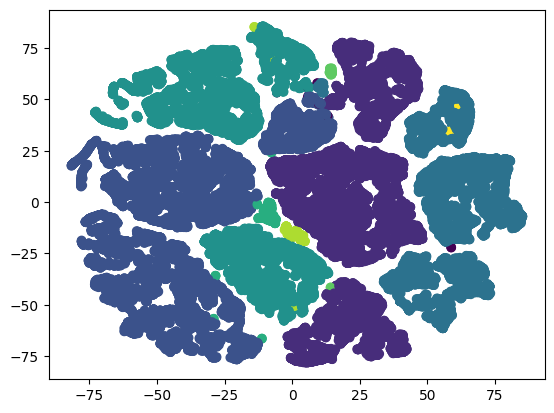

In [ ]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(X_card)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys, c=cluster_labels_dbs)
plt.show()